## Assessing the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
df1 = pd.read_excel("all_alpha_08.xls")
df2 = pd.read_excel("all_alpha_18.xlsx")

In [44]:
df1.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


In [46]:
df2.shape

(2682, 18)

In [47]:
df2.duplicated().any()

False

In [48]:
df2.columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Cert Region',
       'Stnd', 'Stnd Description', 'Underhood ID', 'Veh Class',
       'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay', 'Comb CO2'],
      dtype='object')

In [49]:
## Unique values in cylinder in dataframe 1
df1['Cyl'].unique()

array(['(6 cyl)', '(4 cyl)', '(12 cyl)', '(8 cyl)', '(10 cyl)', '(16 cyl)',
       '(5 cyl)', nan, '(2 cyl)'], dtype=object)

In [50]:
## Unique values in cyliner in dataframe 2
df2['Cyl'].unique()

array([  4.,   6.,   8.,  12.,  10.,   5.,  16.,   2.,  nan,   3.])

In [26]:
## Fuel type present in df1 2008 dataframe
df1['Fuel'].unique()

array(['Gasoline', 'ethanol/gas', 'ethanol', 'diesel', 'CNG'], dtype=object)

In [27]:
## Fuel type present in df2 2018 dataframe
df2['Fuel'].unique()

array(['Gasoline', 'Gasoline/Electricity', 'Diesel', 'Electricity',
       'Ethanol/Gas', 'Hydrogen'], dtype=object)

## Cleaning Column Labels
1. Drop extraneous columns
Drop features that aren't consistent (not present in both datasets) or aren't relevant to our questions. Use pandas' drop function.

Columns to Drop:
From 2008 dataset: 'Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'
From 2018 dataset: 'Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'

## 2. Rename Columns
Change the "Sales Area" column label in the 2008 dataset to "Cert Region" for consistency.

In [51]:
df1.drop(['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'], axis=1, inplace=True)
df1.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,15,20,17,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,17,22,19,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,17,22,19,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,midsize car,7,16,24,19,5,no


In [52]:
df2.drop(['Stnd', 'Underhood ID', 'Stnd Description', 'Comb CO2'],axis=1, inplace=True)
df2.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,CA,small car,3,25,35,29,6,No
1,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,FA,small car,3,25,35,29,6,No
2,ACURA MDX,3.0,6.0,AMS-7,4WD,Gasoline,CA,small SUV,3,26,27,27,6,No
3,ACURA MDX,3.0,6.0,AMS-7,4WD,Gasoline,FA,small SUV,3,26,27,27,6,No
4,ACURA MDX,3.5,6.0,SemiAuto-9,2WD,Gasoline,CA,small SUV,3,19,27,22,4,No


In [53]:
df1.rename(columns=lambda x: x.strip().lower().replace(" ","_"),inplace=True)
df1.head()

,model,displ,cyl,trans,drive,fuel,sales_area,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,15,20,17,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,17,22,19,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,17,22,19,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,midsize car,7,16,24,19,5,no


In [31]:
df1.rename(columns={'sales_area':'cert_region'})

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,15,20,17,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,17,22,19,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,17,22,19,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,midsize car,7,16,24,19,5,no
5,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,FA,midsize car,6,16,24,19,5,no
6,ACURA TL,3.2,(6 cyl),Auto-S5,2WD,Gasoline,CA,midsize car,7,18,26,21,6,yes
7,ACURA TL,3.5,(6 cyl),Auto-S5,2WD,Gasoline,CA,midsize car,7,17,26,20,6,yes
8,ACURA TL,3.5,(6 cyl),Man-6,2WD,Gasoline,CA,midsize car,7,18,27,21,6,yes
9,ACURA TL,3.2,(6 cyl),Auto-S5,2WD,Gasoline,FA,midsize car,6,18,26,21,6,no


In [54]:
df2.rename(columns=lambda x: x.strip().lower().replace(" ","_"),inplace=True)

In [55]:
df1.rename(columns={'sales_area':'cert_region'},inplace=True)

In [56]:
df1.head(2)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,15,20,17,4,no


In [57]:
## compare columns are equal in both Dataset
(df1.columns == df2.columns).all()

True

In [58]:
## New edited file saved in the  csv format

df1.to_csv('df1_08.csv',index=False)
df2.to_csv('df2_18.csv',index=False)

# Filter, Drop Nulls, Dedupe

In [39]:
df_08 = pd.read_csv('df1_08.csv')
df_18 = pd.read_csv('df2_18.csv')

In [40]:
# View Dimension of the dataset
df_08.shape

(2404, 14)

In [42]:
# View Dimension of the dataset
df_18.shape

(2682, 14)

## Filter by Certification Region

In [59]:
# filter datasets for rows following California standards
df_08 = df_08.query('cert_region == "CA"')
df_18 = df_18.query('cert_region == "CA"')

In [60]:
# confirm only certification region is California
df_08['cert_region'].unique()

array(['CA'], dtype=object)

In [61]:
# confirm only certification region is California
df_18['cert_region'].unique()

array(['CA'], dtype=object)

In [62]:
# drop certification region columns form both datasets
df_08.drop('cert_region', axis=1, inplace=True)
df_18.drop('cert_region', axis=1, inplace=True)

In [63]:
df_08.shape

(1084, 13)

In [64]:
df_18.shape

(1322, 13)

## Drop Rows with Missing Values

In [65]:
# view missing value count for each feature in 2008
df_08.isnull().sum()

model                    0
displ                    0
cyl                     75
trans                   75
drive                   37
fuel                     0
veh_class                0
air_pollution_score      0
city_mpg                75
hwy_mpg                 75
cmb_mpg                 75
greenhouse_gas_score    75
smartway                 0
dtype: int64

In [66]:
# view missing value count for each feature in 2018
df_18.isnull().sum()

model                    0
displ                   20
cyl                     20
trans                    0
drive                    0
fuel                     0
veh_class                0
air_pollution_score      0
city_mpg                 0
hwy_mpg                  0
cmb_mpg                  0
greenhouse_gas_score     0
smartway                 0
dtype: int64

In [67]:
# drop rows with any null values in both datasets
df_08.dropna(inplace=True)
df_18.dropna(inplace=True)

In [68]:
# checks if any of columns in 2008 have null values - should print False
df_08.isnull().sum().any()

False

In [69]:
# checks if any of columns in 2018 have null values - should print False
df_18.isnull().sum().any()

False

## Dedupe Data

In [70]:
# print number of duplicates in 2008 and 2018 datasets
print(df_08.duplicated().sum())
print(df_18.duplicated().sum())

23
10


In [71]:
# drop duplicates in both datasets
df_08.drop_duplicates(inplace=True)
df_18.drop_duplicates(inplace=True)

In [72]:
# print number of duplicates again to confirm dedupe - should both be 0
print(df_08.duplicated().sum())
print(df_18.duplicated().sum())

0
0


In [73]:
# save progress for the next section
df_08.to_csv('data_08_v2.csv', index=False)
df_18.to_csv('data_18_v2.csv', index=False)

## Fixing cyl Data Type
2008: extract int from string
2018: convert float to int

In [84]:
df_08 = pd.read_csv('data_08_v2.csv')
df_18 = pd.read_csv('data_18_v2.csv') 

In [85]:
# check value counts for the 2008 cyl column
df_08['cyl'].value_counts()

(6 cyl)     409
(4 cyl)     283
(8 cyl)     199
(5 cyl)      48
(12 cyl)     30
(10 cyl)     14
(2 cyl)       2
(16 cyl)      1
Name: cyl, dtype: int64

In [86]:
# Extract int from strings in the 2008 cyl column
df_08['cyl'] = df_08['cyl'].str.extract('(\d+)').astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


In [87]:
# Check value counts for 2008 cyl column again to confirm the change
df_08['cyl'].value_counts()

6     409
4     283
8     199
5      48
12     30
10     14
2       2
16      1
Name: cyl, dtype: int64

In [88]:
# convert 2018 cyl column to int
df_18['cyl'] = df_18['cyl'].astype(int)


## Fixing air_pollution_score Data Type
2008: convert string to float
2018: convert int to float

In [89]:
df_08[df_08.air_pollution_score == '6/4']

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


## It's not just the air pollution score!
The mpg columns and greenhouse gas scores also seem to have the same problem - maybe that's why these were all saved as strings! According to this link, which I found from the PDF documentation:

"If a vehicle can operate on more than one type of fuel, an estimate is provided for each fuel type."
Ohh.. so all vehicles with more than one fuel type, or hybrids, like the one above (it uses ethanol AND gas) will have a string that holds two values - one for each. This is a little tricky, so I'm going to show you how to do it with the 2008 dataset, and then you'll try it with the 2018 dataset.

In [90]:
# First, let's get all the hybrids in 2008
hb_08 = df_08[df_08['fuel'].str.contains('/')]
hb_08

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [91]:
# hybrids in 2018
hb_18 = df_18[df_18['fuel'].str.contains('/')]
hb_18

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
25,AUDI A3 e-tron,1.4,4,AMS-6,2WD,Gasoline/Electricity,small car,7,34/81,39/86,36/83,10,Elite
83,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
109,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
110,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite
125,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,large car,3,25/62,29/68,27/64,9,Yes
167,BMW X5 xDrive40e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,standard SUV,3,23/55,25/57,24/56,8,Yes
173,BMW i3 (94Ah),0.6,2,Auto-1,2WD,Gasoline/Electricity,small car,7,36/117,33/101,35/109,10,Elite
174,BMW i3s (94Ah),0.6,2,Auto-1,2WD,Gasoline/Electricity,small car,7,36/117,33/101,35/109,10,Elite
202,CADILLAC CT6 Plug-In,2.0,4,CVT,2WD,Gasoline/Electricity,midsize car,3,23/56,29/71,25/62,10,Yes
258,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,large car,5,14/18,20/28,16/22,4,No


We're going to take each hybrid row and split them into two new rows - one with values for the first fuel type (values before the "/"), and the other with values for the second fuel type (values after the "/"). Let's separate them with two dataframes!

In [92]:
# create two copies of the 2008 hybrids dataframe
df1 = hb_08.copy()  # data on first fuel type of each hybrid vehicle
df2 = hb_08.copy()  # data on second fuel type of each hybrid vehicle

# Each one should look like this
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


For this next part, we're going use Pandas' apply function. See the docs here.

In [93]:
# columns to split by "/"
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

In [94]:
# this dataframe holds info for the FIRST fuel type of the hybrid
# aka the values before the "/"s
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no


In [95]:
# this dataframe holds info for the SECOND fuel type of the hybrid
# aka the values before the "/"s
df2

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [96]:
# combine dataframes to add to the original dataframe
new_rows = df1.append(df2)

# now we have separate rows for each fuel type of each vehicle!
new_rows

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [97]:
# drop the original hybrid rows
df_08.drop(hb_08.index, inplace=True)

# add in our newly separated rows
df_08 = df_08.append(new_rows, ignore_index=True)

In [98]:
# check that all the original hybrid rows with "/"s are gone
df_08[df_08['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [99]:
df_08.shape

(987, 13)

# Repeat this process for the 2018 dataset

In [100]:
# create two copies of the 2018 hybrids dataframe, hb_18
df1 = hb_18.copy()
df2 = hb_18.copy()

## Split values for fuel, city_mpg, hwy_mpg, cmb_mpg
You don't need to split for air_pollution_score or greenhouse_gas_score here because these columns are already ints in the 2018 dataset.

In [101]:
# list of columns to split
split_columns = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

In [102]:
# append the two dataframes
new_rows = df1.append(df2)

# drop each hybrid row from the original 2018 dataframe
# do this by using Pandas drop function with hb_18's index
df_18.drop(hb_18.index, inplace=True)

# append new_rows to df_18
df_18 = df_18.append(new_rows, ignore_index=True)

In [103]:
# check that they're gone
df_18[df_18['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [104]:
df_18.shape

(1368, 13)

## Now we can comfortably continue the changes needed for air_pollution_score! Here they are again:
2008: convert string to float
2018: convert int to float

In [105]:
# convert string to float for 2008 air pollution column
df_08.air_pollution_score = df_08.air_pollution_score.astype(float)

In [106]:
# convert int to float for 2018 air pollution column
df_18.air_pollution_score = df_18.air_pollution_score.astype(float)

In [107]:
df_08.to_csv('data_08_v4.csv', index=False)
df_18.to_csv('data_18_v4.csv', index=False)

## Fix city_mpg, hwy_mpg, cmb_mpg datatypes¶
2008 and 2018: convert string to float

In [108]:
df_08 = pd.read_csv('data_08_v4.csv')
df_18 = pd.read_csv('data_18_v4.csv')

In [109]:
# convert mpg columns to floats
mpg_columns = ['city_mpg', 'hwy_mpg', 'cmb_mpg']
for c in mpg_columns:
    df_18[c] = df_18[c].astype(float)
    df_08[c] = df_08[c].astype(float)

## Fix greenhouse_gas_score datatype
2008: convert from float to int

In [119]:
# convert from float to int
df_08['greenhouse_gas_score'] = df_08['greenhouse_gas_score'].astype(int)
df_18['greenhouse_gas_score'] = df_18['greenhouse_gas_score'].astype(int)

## All the dataypes are now fixed! Take one last check to confirm all the changes

In [120]:
df_08.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int32
smartway                 object
dtype: object

In [121]:
df_18.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int32
smartway                 object
dtype: object

In [122]:
df_08.dtypes == df_18.dtypes

model                   True
displ                   True
cyl                     True
trans                   True
drive                   True
fuel                    True
veh_class               True
air_pollution_score     True
city_mpg                True
hwy_mpg                 True
cmb_mpg                 True
greenhouse_gas_score    True
smartway                True
dtype: bool

In [123]:
# Save your final CLEAN datasets as new files!
df_08.to_csv('clean_08.csv', index=False)
df_18.to_csv('clean_18.csv', index=False)

## Exploring with Visuals

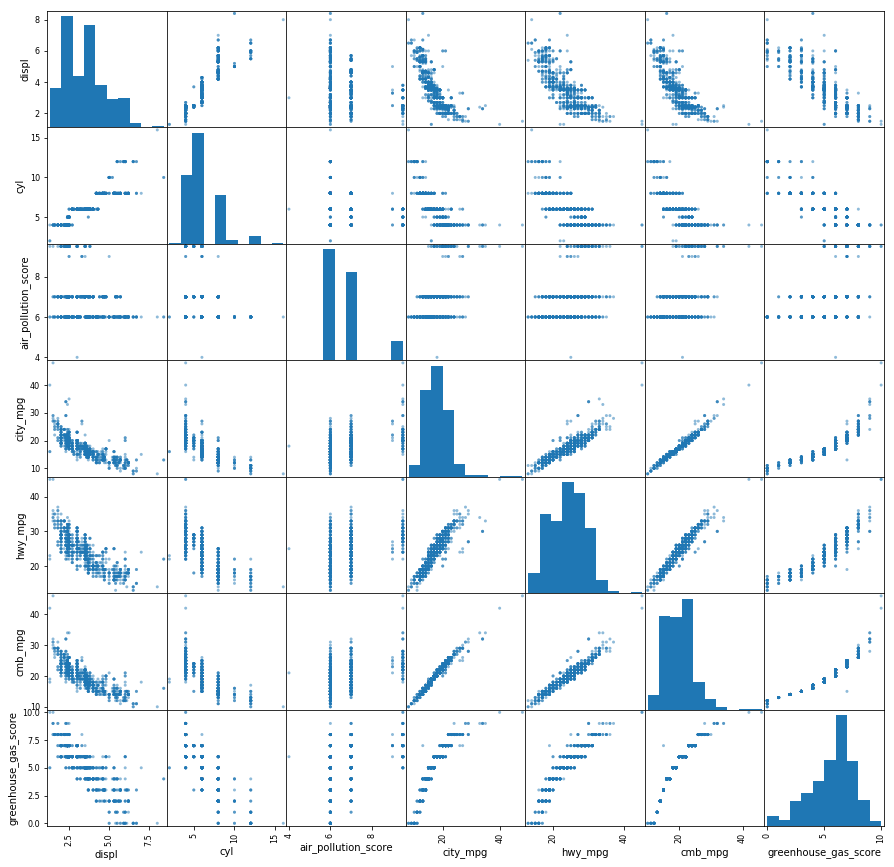

In [124]:
# sctter matrix plot of 2008 dataset
pd.plotting.scatter_matrix(df_08, figsize=(15, 15));

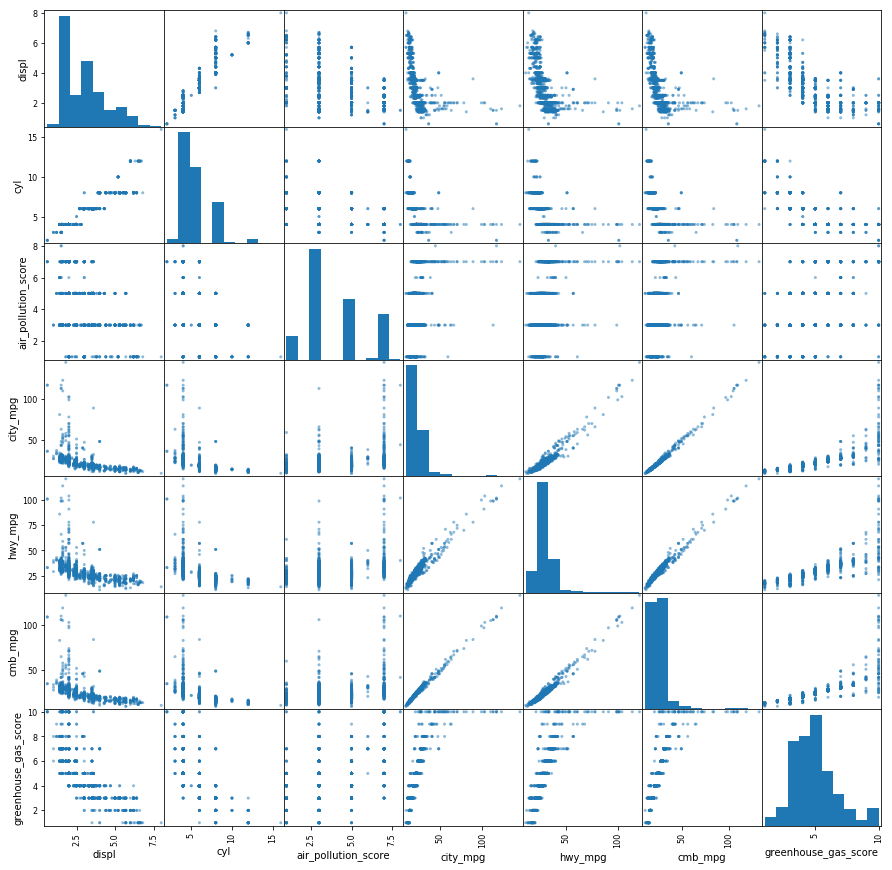

In [125]:
# scatter matrixplot for 2018 dataset
pd.plotting.scatter_matrix(df_18, figsize=(15, 15));

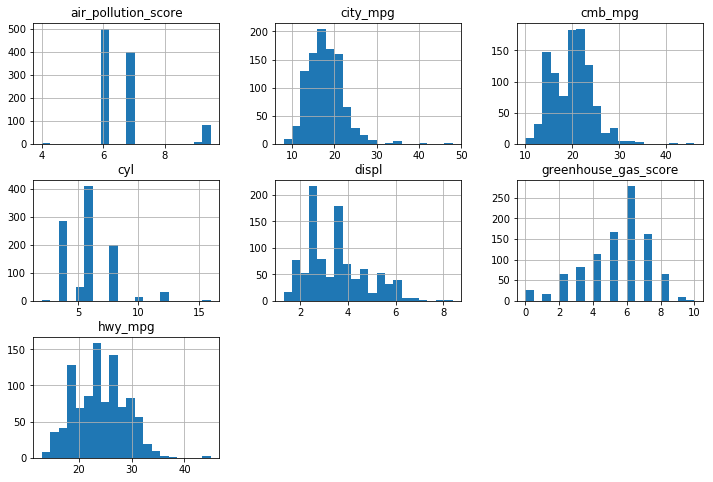

In [126]:
# Histogram plot of 2008 dataset
df_08.hist(bins=20, figsize=(12,8));

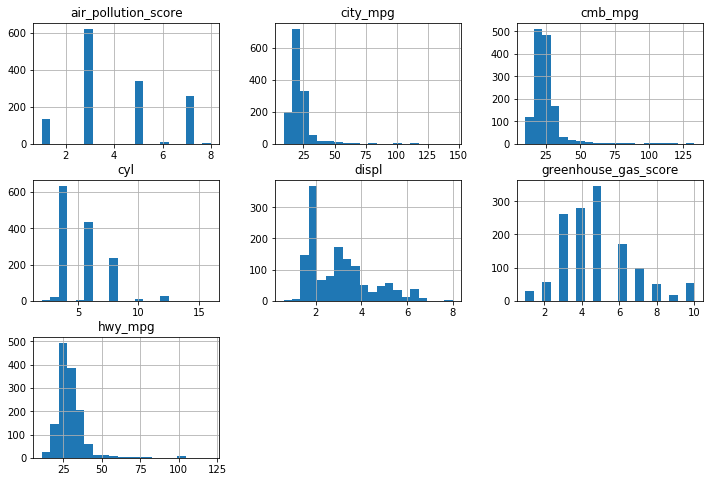

In [127]:
# Histogram plot for 2018 dataset
df_18.hist(bins=20, figsize=(12,8));

## Drawing Conclusions

## Q1: Are more unique models using alternative sources of fuel? By how much?
Let's first look at what the sources of fuel are and which ones are alternative sources.

In [131]:
df_08.fuel.value_counts()

Gasoline    984
ethanol       1
CNG           1
gas           1
Name: fuel, dtype: int64

In [132]:
df_18.fuel.value_counts()

Gasoline       1214
Ethanol          41
Gas              41
Diesel           37
Electricity      35
Name: fuel, dtype: int64

In [133]:
# how many unique models used alternative sources of fuel in 2008
alt_08 = df_08.query('fuel in ["CNG", "ethanol"]').model.nunique()
alt_08

2

In [134]:
# how many unique models used alternative sources of fuel in 2018
alt_18 = df_18.query('fuel in ["Ethanol", "Electricity"]').model.nunique()
alt_18

52

In [136]:
# total unique models each year
total_08 = df_08.model.nunique()
total_18 = df_18.model.nunique()
total_08, total_18

(377, 607)

In [137]:
prop_08 = alt_08/total_08
prop_18 = alt_18/total_18
prop_08, prop_18

(0.005305039787798408, 0.085667215815486)

## Q2: How much have vehicle classes improved in fuel economy?
Let's look at the average fuel economy for each vehicle class for both years.

In [138]:
veh_08 = df_08.groupby('veh_class').cmb_mpg.mean()
veh_08

veh_class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
van              14.952381
Name: cmb_mpg, dtype: float64

In [139]:
veh_18 = df_18.groupby('veh_class').cmb_mpg.mean()
veh_18

veh_class
large car          24.482759
midsize car        30.188940
minivan            28.200000
pickup             18.349206
small SUV          24.356223
small car          25.766827
special purpose    19.937500
standard SUV       19.405405
station wagon      30.054545
van                16.000000
Name: cmb_mpg, dtype: float64

In [140]:
# how much they've increased by for each vehicle class
inc = veh_18 - veh_08
inc

veh_class
SUV                     NaN
large car          5.973668
midsize car        8.587491
minivan            9.082353
pickup             2.072098
small SUV               NaN
small car          4.661722
special purpose         NaN
standard SUV            NaN
station wagon      7.687879
van                1.047619
Name: cmb_mpg, dtype: float64

## Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?

We can analyze this by filtering each dataframe by SmartWay classification and exploring these datasets.

In [142]:
# smartway labels for 2008
df_08.smartway.unique()

array(['no', 'yes'], dtype=object)

In [143]:
# get all smartway vehicles in 2008
smart_08 = df_08.query('smartway == "yes"')

In [144]:
# explore smartway vehicles in 2008
smart_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2.602895,4.826316,7.365789,20.984211,28.413158,23.736842,6.868421
std,0.623436,1.002025,1.148195,3.442672,3.075194,3.060379,0.827338
min,1.300000,4.000000,6.000000,17.000000,22.000000,20.000000,6.000000
25%,2.275000,4.000000,7.000000,19.000000,26.000000,22.000000,6.000000
50%,2.400000,4.000000,7.000000,20.000000,28.000000,23.000000,7.000000
75%,3.000000,6.000000,7.000000,22.000000,30.000000,25.000000,7.000000
max,5.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


Use what you've learned so for to further explore this dataset on 2008 smartway vehicles.

In [145]:
# smartway labels for 2018
df_18.smartway.unique()

array(['No', 'Yes', 'Elite'], dtype=object)

In [146]:
# get all smartway vehicles in 2018
smart_18 = df_18.query('smartway in ["Yes", "Elite"]')

In [147]:
smart_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,1.896759,4.162037,5.259259,38.291667,43.541667,40.231481,8.143519
std,0.625161,0.923413,1.826779,21.324582,17.176732,19.306635,1.217223
min,0.600000,2.000000,3.000000,19.000000,23.000000,21.000000,7.000000
25%,1.500000,4.000000,3.000000,28.000000,35.000000,31.000000,7.000000
50%,1.800000,4.000000,6.000000,30.000000,38.000000,33.000000,8.000000
75%,2.000000,4.000000,7.000000,40.000000,43.000000,42.000000,9.000000
max,4.000000,8.000000,8.000000,145.000000,121.000000,133.000000,10.000000
